In [75]:
%matplotlib inline

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage
import cmath
import math
import Image
from keras.datasets import mnist


def resize(input_im):
    im = Image.fromarray(input_im)
    im = im.resize([10,10], Image.ANTIALIAS)
    rz_im = np.asarray((im.getdata()))
    return np.reshape(rz_im, (10,10))

def getXsvd(imgmat,k):
    U, sigma, V = np.linalg.svd(imgmat)
    reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    plt.imshow(reconstimg, cmap='gray')
    return reconstimg
    
def getX_10():    
    X_10_train = np.zeros((60000,10,10))
    X_10_test =  np.zeros((10000,10,10))
    (X_train, _), (X_test, _) = mnist.load_data()
    for i in range(X_train.shape[0]):
        X_10_train[i,:,:] = resize(X_train[i])
    for i in range(X_test.shape[0]):
        X_10_test[i,:,:] = resize(X_test[i])
    return X_10_train,X_10_test

(28, 28)

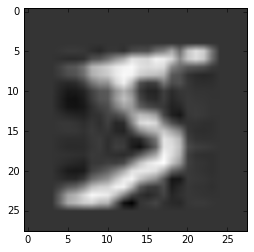

In [77]:
(X_train, _), (_, _) = mnist.load_data()
im_svd = getXsvd(X_train[0],5)
im_svd.shape

In [95]:
from __future__ import print_function
import numpy as np
import random
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2, activity_l2


batch_size = 512
nb_classes = 10
nb_epoch = 12

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_10_train, X_10_test = getX_10()

X_10_train = X_10_train.reshape(60000, 100)
X_10_test = X_10_test.reshape(10000, 100)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_10_train = X_10_train.astype('float32')
X_10_test = X_10_test.astype('float32')
X_10_train /= 255
X_10_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

FC0 = Dense(512, W_regularizer=l2(0), input_shape=(100,))
FC1 = Dense(512)
FC2 = Dense(10)

model = Sequential()
model.add(FC0)
model.add(Activation('relu'))
model.add(FC1)
model.add(Activation('relu'))
model.add(FC2)
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(X_10_train[:30000], Y_train[:30000],
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_10_test, Y_test))

score = model.evaluate(X_10_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_10_train[:30000], Y_train[:30000], verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_77 (Dense)                 (None, 512)           51712       dense_input_27[0][0]             
____________________________________________________________________________________________________
activation_64 (Activation)       (None, 512)           0           dense_77[0][0]                   
____________________________________________________________________________________________________
dense_78 (Dense)                 (None, 512)           262656      activation_64[0][0]              
____________________________________________________________________________________________________
activation_65 (Activation)       (None, 512)           0           dense_78[0][0]                   
___________________________________________________________________________________________

In [96]:
history = model.fit(X_10_train, Y_train,
                    batch_size=batch_size*5, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_10_test, Y_test))

score = model.evaluate(X_10_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

score = model.evaluate(X_10_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train score: 0.0149799853823
Train accuracy: 0.905916666667
Test score: 0.0141574536461
Test accuracy: 0.912


# For making it works with conv lay

In [101]:
from __future__ import print_function
import numpy as np
import random
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2, activity_l2
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten


batch_size = 512
nb_classes = 10
nb_epoch = 12

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_10_train, X_10_test = getX_10()

X_10_train = X_10_train.reshape(60000, 100)
X_10_test = X_10_test.reshape(10000, 100)
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)

img_rows, img_cols = 28,28
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_10_train = X_10_train.astype('float32')
X_10_test = X_10_test.astype('float32')
X_10_train /= 255
X_10_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


nb_filters = 1
nb_conv = 15
FC0 = Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(1, 28, 28))
FC1 = Dense(512)
FC2 = Dense(10)

model = Sequential()
model.add(FC0)
model.add(Activation('relu'))
model.add(Flatten())
model.add(FC1)
model.add(Activation('relu'))
model.add(FC2)
model.add(Activation('softmax'))
model.summary()

model.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_4 (Convolution2D)  (None, 1, 14, 14)     226         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
activation_72 (Activation)       (None, 1, 14, 14)     0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 196)           0           activation_72[0][0]              
____________________________________________________________________________________________________
dense_86 (Dense)                 (None, 512)           100864      flatten_2[0][0]                  
___________________________________________________________________________________________

# Train again for other 60 epochs

In [102]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch*5,
                    verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(X_train, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 19s - loss: 0.0071 - acc: 0.9551 - val_loss: 0.0088 - val_acc: 0.9413
Epoch 2/60
60000/60000 [==============================] - 23s - loss: 0.0068 - acc: 0.9573 - val_loss: 0.0072 - val_acc: 0.9544
Epoch 3/60
60000/60000 [==============================] - 19s - loss: 0.0065 - acc: 0.9583 - val_loss: 0.0070 - val_acc: 0.9569
Epoch 4/60
60000/60000 [==============================] - 19s - loss: 0.0062 - acc: 0.9613 - val_loss: 0.0083 - val_acc: 0.9464
Epoch 5/60
60000/60000 [==============================] - 26s - loss: 0.0059 - acc: 0.9624 - val_loss: 0.0062 - val_acc: 0.9608
Epoch 6/60
60000/60000 [==============================] - 21s - loss: 0.0058 - acc: 0.9635 - val_loss: 0.0072 - val_acc: 0.9533
Epoch 7/60
60000/60000 [==============================] - 23s - loss: 0.0055 - acc: 0.9653 - val_loss: 0.0073 - val_acc: 0.9544
Epoch 8/60
60000/60000 [==============================

ValueError: I/O operation on closed file

# Playing with last layer (only Dense10)

In [163]:
from __future__ import print_function
import numpy as np
import random
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.regularizers import l2, activity_l2


batch_size = 512
nb_classes = 10
nb_epoch = 256

train_slice = 1000
test_slice = 10000


# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train_10000 = X_train[:train_slice]
X_test_10000 = X_test[:test_slice]

print(X_train_10000.shape[0], 'train samples')
print(X_test_10000.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train[:train_slice], nb_classes)
Y_test = np_utils.to_categorical(y_test[:test_slice], nb_classes)

FC0 = Dense(512, input_shape=(784,))
FC1 = Dense(512)
FC2 = Dense(10)

model = Sequential()
model.add(FC0)
model.add(Activation('relu'))
model.add(FC1)
model.add(Activation('relu'))
model.add(FC2)
model.add(Activation('softmax'))

model.summary()

model.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(X_train_10000, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_test_10000, Y_test))
score = model.evaluate(X_test_10000, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
test_score = score[0]

score = model.evaluate(X_train_10000, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

1000 train samples
10000 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_103 (Dense)                (None, 512)           401920      dense_input_33[0][0]             
____________________________________________________________________________________________________
activation_90 (Activation)       (None, 512)           0           dense_103[0][0]                  
____________________________________________________________________________________________________
dense_104 (Dense)                (None, 512)           262656      activation_90[0][0]              
____________________________________________________________________________________________________
activation_91 (Activation)       (None, 512)           0           dense_104[0][0]                  
_____________________________________________________

In [164]:
history = model.fit(X_train_10000, Y_train,
                    batch_size=128, nb_epoch=nb_epoch,
                    verbose=0, validation_data=(X_test_10000, Y_test))

In [165]:
score = model.evaluate(X_test_10000, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
test_score = score[0]

score = model.evaluate(X_train_10000, Y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

Test score: 0.0179146409438
Test accuracy: 0.8825
Train score: 0.00100873790833
Train accuracy: 0.993


In [ ]:
layers_weights = [model.layers[0].get_weights(), model.layers[2].get_weights(),model.layers[4].get_weights()]

# for backup purpose if we did something wrong, we can get the weight right here, no need to train the whole network
orignial_layers_weight = np.copy(layers_weights)

# for altering purpose make changes then put back into the network
layer_4_altered_weight = np.copy(layers_weights[2])

# to keep track of rate of change wrt the loss and weight
l_wrt_w = np.zeros(layers_weights[2][0].shape + (2,))


print(l_wrt_w.shape)

model.layers[0].set_weights(layers_weights[0])
model.layers[2].set_weights(layers_weights[1])


for idx in [0,2,4]:
    model.layers[idx].trainable = False

for i in range(l_wrt_w.shape[0]):
    for j in range(l_wrt_w.shape[1]):
        
        # keep the originial weight, so we don't need to do the math twice(*10, /10)
        weight_dummy = layer_4_altered_weight[0][i][j]
        
        # make it ten times much bigger or smaller, see how to changes the network
        layer_4_altered_weight[0][i][j] *= 10            
        
        # set the weight to the network, and evaluate the score
        model.layers[4].set_weights(layer_4_altered_weight)
        score = model.evaluate(X_test_10000, Y_test, verbose=0)
        
        l_wrt_w[i][j][0] = test_score - score[0]
        l_wrt_w[i][j][1] = weight_dummy - layer_4_altered_weight[0][i][j]

        if (j%5 == 0):
            print("i,j = ", i, j)
        
        # set the weight back
        layer_4_altered_weight[0][i][j] = layers_weights[2][0][i][j]

(512, 10, 2)


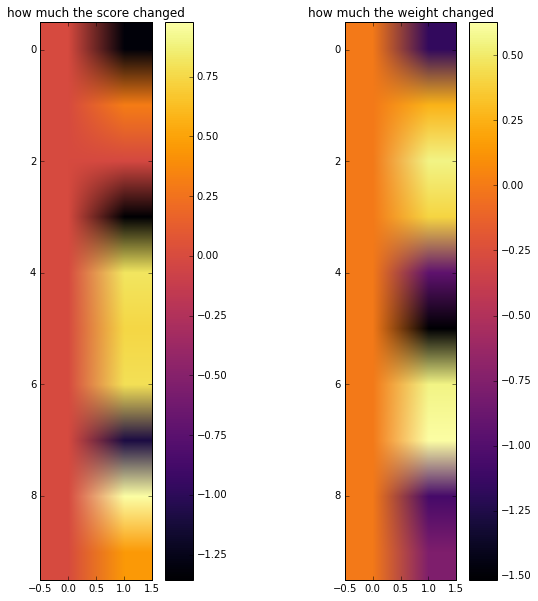

In [191]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print(l_wrt_w.shape)

intp = 'None'

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(l_wrt_w[:][:][:][0], cmap='inferno')#, interpolation=intp)
plt.title('how much the score changed')
plt.colorbar()

plt.subplot(122)
plt.imshow(l_wrt_w[:][:][:][1], cmap='inferno')#, interpolation=intp)
plt.title('how much the weight changed')
plt.colorbar()

In [182]:
print(l_wrt_w[500:510][:][0])

[[-0.00468645  0.73758125]
 [-0.0046776  -0.46307674]
 [-0.00480507 -1.67959082]
 [-0.00483484  0.31978858]
 [-0.00483125  1.46751714]
 [-0.00483194 -0.16768695]
 [-0.00482844  0.85824114]
 [-0.00483542 -0.30353713]
 [-0.00483594  0.0267238 ]
 [-0.00483995  0.39351088]]


# weight form the model which is not generalize well

(512, 10, 2)


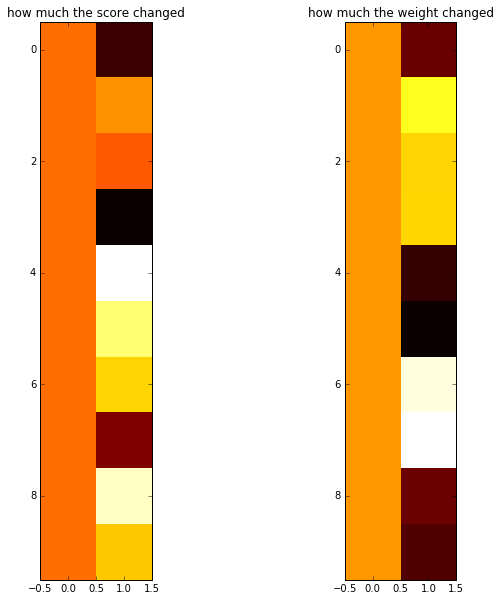

In [159]:
import matplotlib.pyplot as plt
import numpy as np

print(l_wrt_w.shape)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(l_wrt_w[:][:][:][0], cmap='hot', interpolation='nearest')
plt.title('how much the score changed')

plt.subplot(122)
plt.imshow(l_wrt_w[:][:][:][1], cmap='hot', interpolation='nearest')
plt.title('how much the weight changed')

In [167]:
import pickle

with open('l_wrt_w_lastlayer_9888', 'wb') as handle:
    pickle.dump(l_wrt_w, handle)

# pf = open('l_wrt_w_lastlayer_9888','rb')
# l_wrt_w = pickle.load(pf)